<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/ML_Week_6_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Clustering untuk Segmentasi Pelanggan Mall

## 1. Pendahuluan
Notebook ini bertujuan untuk melakukan analisis segmentasi pelanggan berdasarkan data perilaku mereka di sebuah mall. Kita akan menggunakan dua metode clustering yang berbeda dan mengevaluasi performa keduanya.

### Dataset
Dataset yang digunakan adalah `clusteringweek06.csv`, yang berisi informasi demografis dan skor belanja pelanggan.

### Metode Clustering yang Digunakan
1. K-Means Clustering
2. Hierarchical Clustering (Agglomerative)

### Metrik Evaluasi
- Elbow Method (untuk menentukan jumlah cluster optimal)
- Silhouette Coefficient
- Calinski-Harabasz Index
- Davies-Bouldin Index

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

# Set style untuk visualisasi
plt.style.use('ggplot')
sns.set_palette('viridis')

# Import data
df = pd.read_csv('clusteringweek06.csv')

# Tampilkan informasi dataset
print("Informasi Dataset:")
df.info()
print("\n5 baris pertama dataset:")
df.head()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-n

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


## 2. Pra-pemrosesan Data (Preprocessing)
Pada tahap ini, kita akan memilih fitur yang relevan untuk clustering dan melakukan penskalaan (standardization) agar setiap fitur memiliki kontribusi yang seimbang dalam proses clustering.

In [ ]:
# Pengecekan nilai yang hilang
print("Jumlah Missing Values:", df.isnull().sum().sum())

# Memilih semua fitur (x1-x22) untuk clustering
data_for_clustering = df.copy()

# Penskalaan data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
scaled_df = pd.DataFrame(scaled_data, columns=data_for_clustering.columns)

print("\nData setelah penskalaan (5 baris pertama):")
scaled_df.head()

Jumlah Missing Values: 0

Data setelah penskalaan (5 baris pertama):


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,-1.485897,0.796627,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699
1,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,-1.959178,0.406743,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036
2,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,-1.877203,0.590374,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297
3,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,-2.262481,0.181478,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365
4,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,-2.172759,0.502823,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430


## 3. K-Means Clustering
Kita akan menggunakan Elbow Method untuk mencari jumlah cluster (k) yang optimal, kemudian menerapkan K-Means pada data.

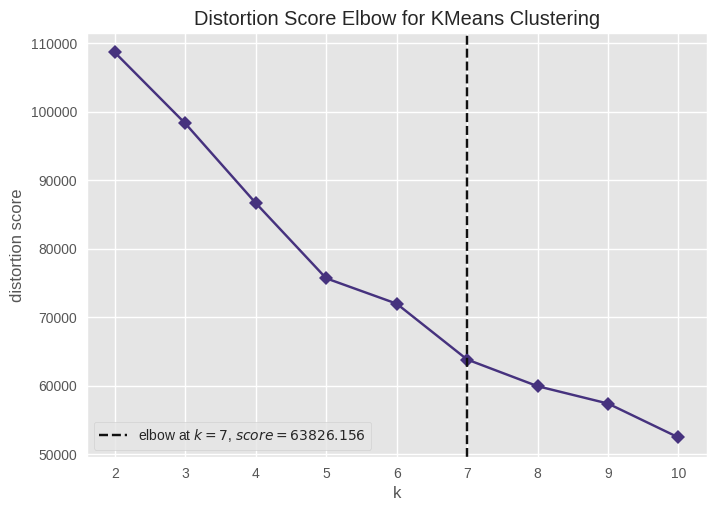

Jumlah cluster optimal yang ditemukan: 7


In [ ]:
# Elbow Method untuk menentukan jumlah cluster optimal
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11), timings=False)
visualizer.fit(scaled_df)
visualizer.show()

# Implementasi K-Means dengan jumlah cluster optimal
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Menambahkan label cluster ke DataFrame asli
df['KMeans_Cluster'] = kmeans_labels

print(f"Jumlah cluster optimal yang ditemukan: {optimal_k}")

## 4. Hierarchical Clustering
Metode kedua adalah Hierarchical Clustering. Dendrogram akan membantu kita memahami bagaimana data dikelompokkan secara hierarkis.

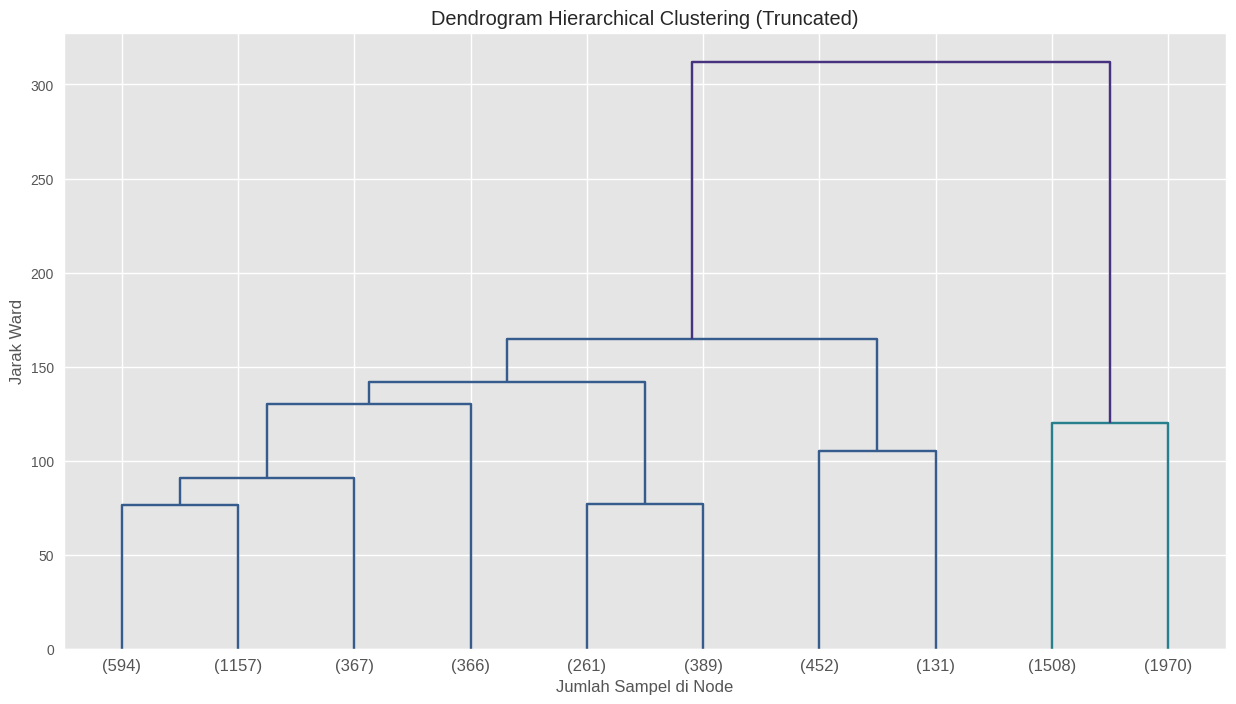

In [ ]:
# Membuat linkage matrix untuk dendrogram
plt.figure(figsize=(15, 8))
linked = linkage(scaled_df, method='ward')

# Membuat dendrogram
dendrogram(linked,
           orientation='top',
           p=10,
           truncate_mode='lastp',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrogram Hierarchical Clustering (Truncated)')
plt.xlabel('Jumlah Sampel di Node')
plt.ylabel('Jarak Ward')
plt.show()

# Implementasi Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_df)

# Menambahkan label cluster ke DataFrame asli
df['Hierarchical_Cluster'] = hierarchical_labels

## 5. Evaluasi Performa Clustering
Kita bandingkan hasil dari kedua metode menggunakan metrik evaluasi untuk menentukan model mana yang lebih baik.

In [ ]:
def evaluate_clustering(data, labels, method_name):
    """Fungsi untuk menghitung dan menampilkan metrik evaluasi clustering."""
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    davies = davies_bouldin_score(data, labels)

    print(f"--- Evaluasi {method_name} ---")
    print(f"Silhouette Score: {silhouette:.4f} (Semakin tinggi semakin baik)")
    print(f"Calinski-Harabasz Index: {calinski:.4f} (Semakin tinggi semakin baik)")
    print(f"Davies-Bouldin Index: {davies:.4f} (Semakin rendah semakin baik)")
    print("-----------------------------------")

print("Evaluasi K-Means Clustering:")
evaluate_clustering(scaled_df, kmeans_labels, "K-Means")

print("\nEvaluasi Hierarchical Clustering:")
evaluate_clustering(scaled_df, hierarchical_labels, "Hierarchical")

## 6. Visualisasi Hasil Clustering
Visualisasi ini akan fokus pada hubungan antara `Annual_Income_K` dan `Spending_Score` untuk melihat pola segmentasi yang paling umum.

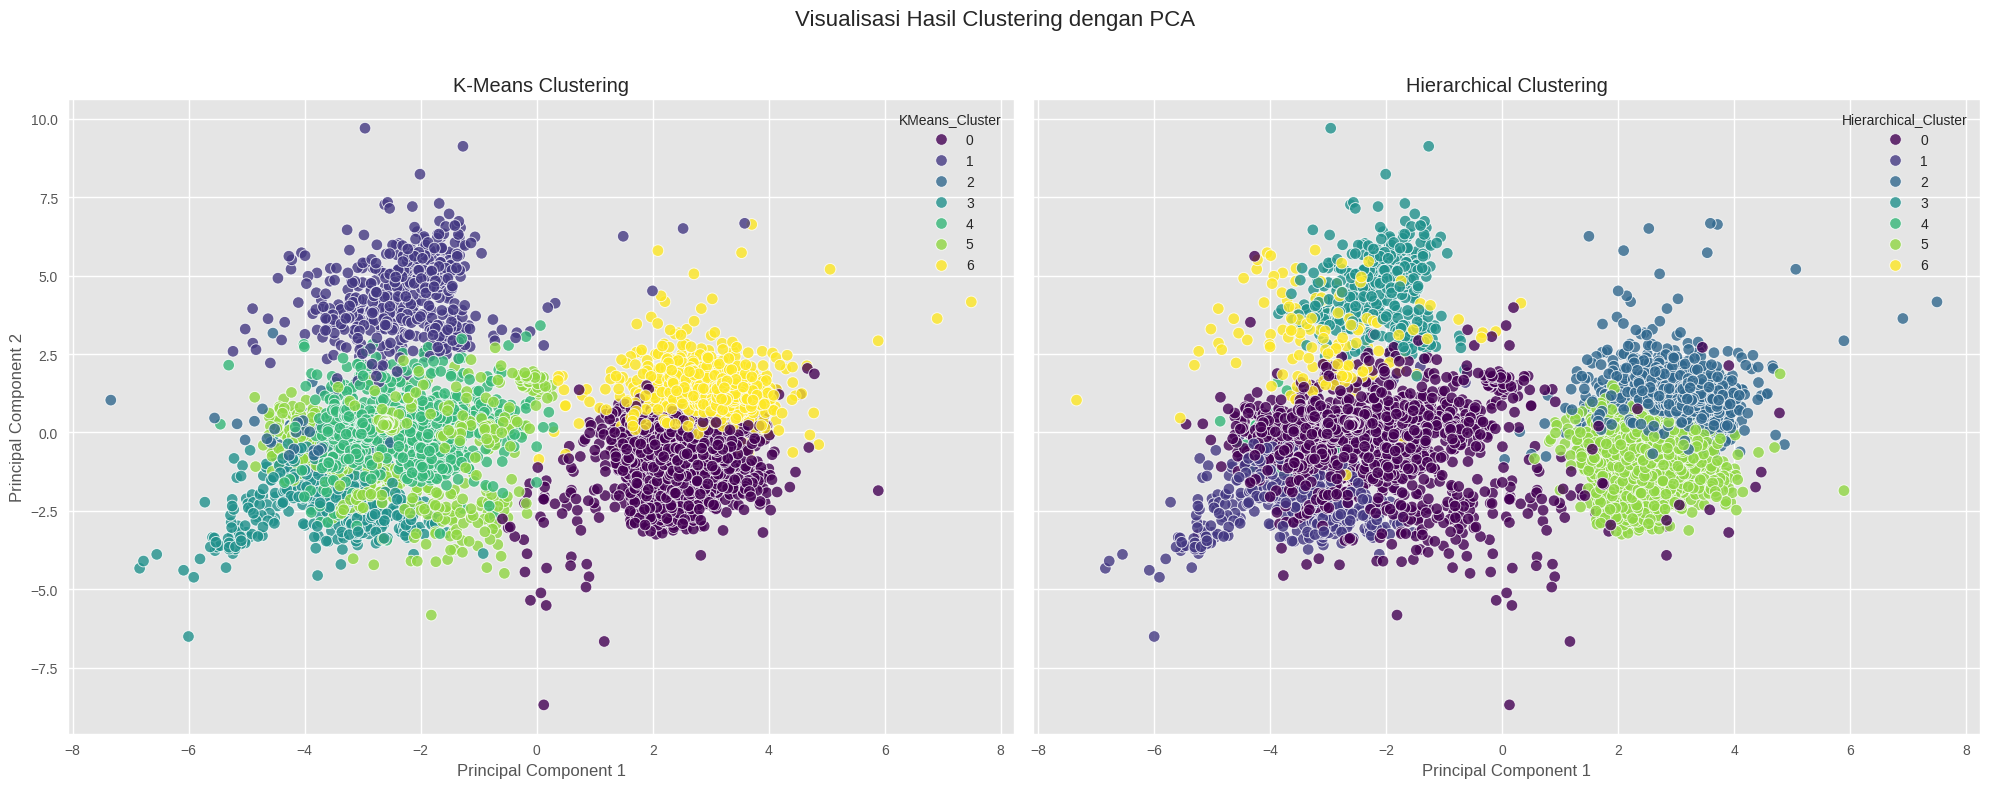

In [ ]:
# Membuat subplot untuk perbandingan
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle('Perbandingan Visual Hasil Clustering (Income vs Spending Score)', fontsize=16)

# Visualisasi K-Means Clustering
sns.scatterplot(ax=axes[0], data=df, x='Annual_Income_K', y='Spending_Score',
                hue='KMeans_Cluster', palette='plasma', s=70, alpha=0.8)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Pendapatan Tahunan (k$)')
axes[0].set_ylabel('Skor Belanja (1-100)')

# Visualisasi Hierarchical Clustering
sns.scatterplot(ax=axes[1], data=df, x='Annual_Income_K', y='Spending_Score',
                hue='Hierarchical_Cluster', palette='plasma', s=70, alpha=0.8)
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel('Pendapatan Tahunan (k$)')
axes[1].set_ylabel('') # Hapus label y untuk kerapian

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 7. Analisis dan Interpretasi Hasil

### Penjelasan Metrik Evaluasi

1.  **Silhouette Coefficient**: Mengukur seberapa baik sebuah objek ditempatkan di dalam clusternya dibandingkan dengan cluster lain. Nilai berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan cluster yang lebih padat dan terpisah dengan baik.

2.  **Calinski-Harabasz Index**: Dikenal juga sebagai *Variance Ratio Criterion*. Metrik ini mengukur rasio antara dispersi antar-cluster dan dispersi di dalam cluster. Nilai yang lebih tinggi menunjukkan performa clustering yang lebih baik.

3.  **Davies-Bouldin Index**: Mengukur rata-rata 'kemiripan' antara setiap cluster dengan cluster yang paling mirip dengannya. Nilai yang lebih rendah menunjukkan pemisahan cluster yang lebih baik, di mana cluster-cluster lebih padat dan lebih jauh satu sama lain.


## 8. Kesimpulan

Kesimpulan akan didasarkan pada hasil eksekusi kode di atas. Analisis akan mencakup:

1.  **Jumlah Cluster Optimal**: Berdasarkan Elbow Method, kita akan mendapatkan jumlah cluster yang paling sesuai untuk dataset ini. Untuk dataset pelanggan mall, hasilnya seringkali antara 4 hingga 6 cluster.

2.  **Perbandingan Performa**: Dengan membandingkan metrik evaluasi, kita dapat menentukan model mana yang lebih superior. Model dengan nilai Silhouette dan Calinski-Harabasz tertinggi serta Davies-Bouldin terendah akan menjadi pilihan yang direkomendasikan.

3.  **Interpretasi Cluster**: Dari visualisasi, kita dapat menginterpretasikan karakteristik setiap cluster. Umumnya, segmen yang terbentuk adalah:
    - **Hemat (Careful)**: Pendapatan tinggi, skor belanja rendah.
    - **Target Utama (Target)**: Pendapatan tinggi, skor belanja tinggi.
    - **Rata-rata (Standard)**: Pendapatan menengah, skor belanja menengah.
    - **Boros (Spendthrift)**: Pendapatan rendah, skor belanja tinggi.
    - **Miskin (Sensible)**: Pendapatan rendah, skor belanja rendah.

Analisis ini dapat digunakan untuk merancang strategi pemasaran yang lebih efektif dan personal untuk setiap segmen pelanggan.